Задание № 1
Файл HR.csv загружен в pandas dataframe




Задание № 2
Основные статистики для переменных:
                         count unique    top  freq        mean        std  \
satisfaction_level     14999.0    NaN    NaN   NaN    0.612834   0.248631   
last_evaluation        14999.0    NaN    NaN   NaN    0.716102   0.171169   
number_project         14999.0    NaN    NaN   NaN    3.803054   1.232592   
average_montly_hours   14999.0    NaN    NaN   NaN  201.050337  49.943099   
time_spend_company     14999.0    NaN    NaN   NaN    3.498233   1.460136   
Work_accident          14999.0    NaN    NaN   NaN     0.14461   0.351719   
left                   14999.0    NaN    NaN   NaN    0.238083   0.425924   
promotion_last_5years  14999.0    NaN    NaN   NaN    0.021268   0.144281   
department               14999     10  sales  4140         NaN        NaN   
salary                   14999      3    low  7316         NaN        NaN   

                        min    25%    50%    75%

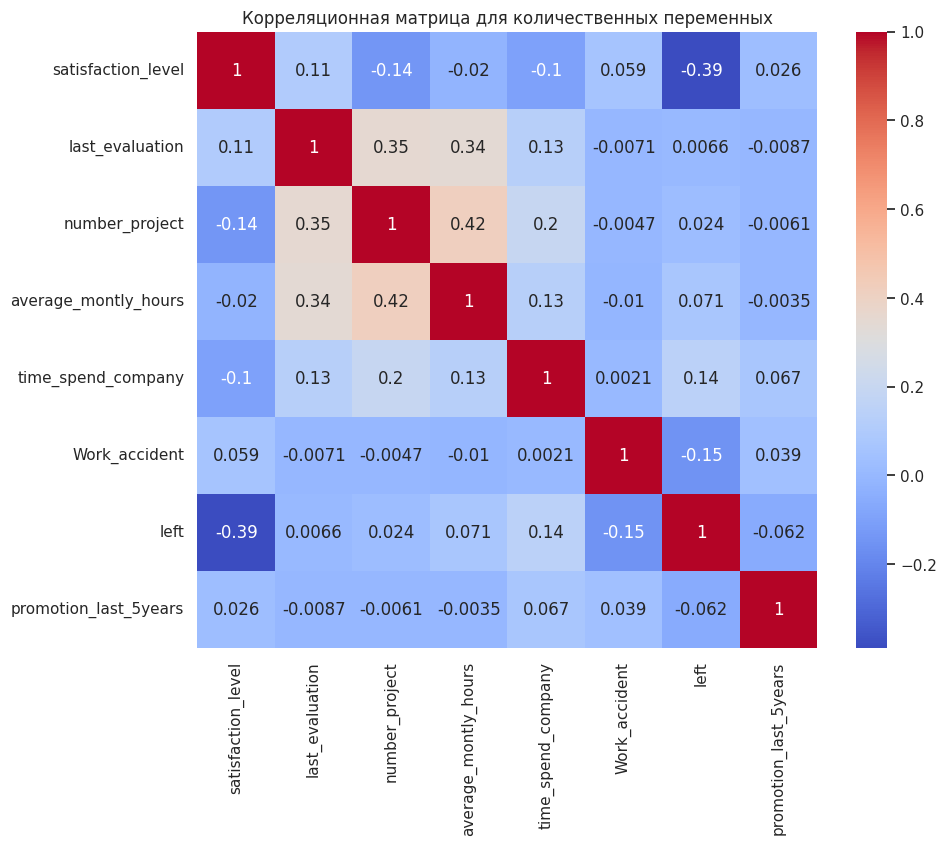

Две самые скоррелированные переменные: ('number_project', 'average_montly_hours')
Две наименее скоррелированные переменные: ('satisfaction_level', 'left')




Задание № 4
Количество сотрудников в каждом департаменте:
department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: salary, dtype: int64




Задание № 5
Показываем распределение сотрудников по зарплатам:


<ipython-input-6-fa1f6a8372e7>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='salary', palette='coolwarm')


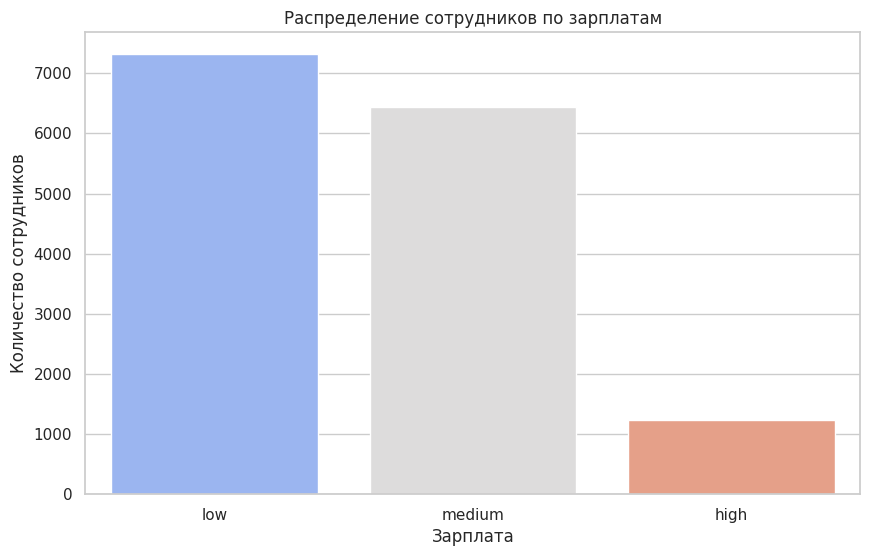





Задание № 6
Показываем распределение сотрудников по зарплатам в каждом департаменте по отдельности:


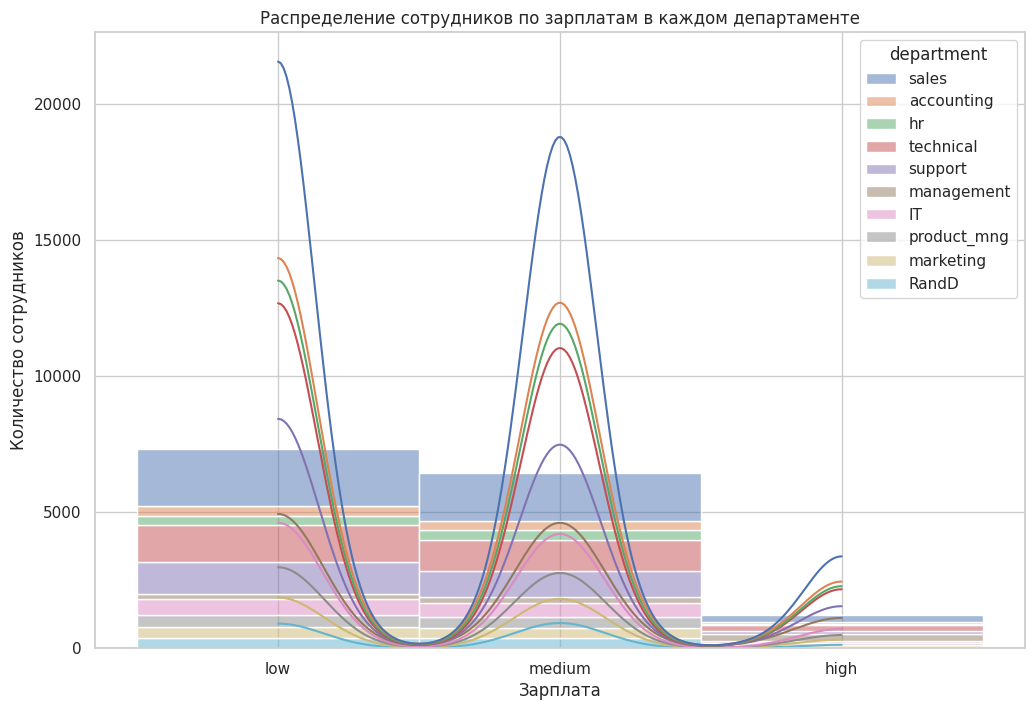





Задание № 7
Проверяем гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом:
Нет достаточно данных для отвержения гипотезы о различии времени работы сотрудников с высоким и низким окладом.




Задание № 8
Для группы 0:
Доля сотрудников с повышением за последние 5 лет: 2.63%
Средняя степень удовлетворенности: 0.67
Среднее количество проектов: 3.79

Для группы 1:
Доля сотрудников с повышением за последние 5 лет: 0.53%
Средняя степень удовлетворенности: 0.44
Среднее количество проектов: 3.86





Задание № 9
Точность модели LDA: 0.75
Отчет классификации:
              precision    recall  f1-score   support

           0       0.79      0.91      0.85      2294
           1       0.45      0.24      0.31       706

    accuracy                           0.75      3000
   macro avg       0.62      0.57      0.58      3000
weighted avg       0.71      0.75      0.72      3000







In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Задание № 1: Загрузка файла HR.csv в pandas dataframe
print("Задание № 1")
url = "https://fix63.ru/colab/HR.csv"
df = pd.read_csv(url)
print("Файл HR.csv загружен в pandas dataframe")
print("\n\n\n")

# Задание № 2: Расчет основных статистик для переменных
print("Задание № 2")
basic_stats = df.describe(include='all').transpose()
# Добавление моды в основные статистики
basic_stats['mode'] = df.mode().loc[0]

print("Основные статистики для переменных:")
print(basic_stats)
print("\n\n\n")

# Задание № 3: Расчет и визуализация корреляционной матрицы
print("Задание № 3")
numeric_variables = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_variables.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица для количественных переменных')
plt.show()

# Определение двух самых скоррелированных и двух наименее скоррелированных переменных
corr_flat = correlation_matrix.unstack().sort_values(ascending=False)
corr_flat = corr_flat[corr_flat != 1]
two_most_correlated = corr_flat.index[0]
two_least_correlated = corr_flat.index[-1]

print(f"Две самые скоррелированные переменные: {two_most_correlated}")
print(f"Две наименее скоррелированные переменные: {two_least_correlated}")
print("\n\n\n")

# Задание № 4: Рассчитайте сколько сотрудников работает в каждом департаменте.
# Рассчитываем количество сотрудников в каждом департаменте
print("Задание № 4")
employeecountbydepartment = df.groupby('department')['salary'].count()


print("Количество сотрудников в каждом департаменте:")
print(employeecountbydepartment)
print("\n\n\n")

# Задание № 5: Показываем распределение сотрудников по зарплатам
print("Задание № 5")
print("Показываем распределение сотрудников по зарплатам:")
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='salary', palette='coolwarm')
plt.title('Распределение сотрудников по зарплатам')
plt.xlabel('Зарплата')
plt.ylabel('Количество сотрудников')
plt.show()
print("\n\n\n")

# Задание № 6: Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности.
# Создаем графики распределения зарплат по каждому департаменту
print("Задание № 6")
print("Показываем распределение сотрудников по зарплатам в каждом департаменте по отдельности:")
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
sns.histplot(data=df, x="salary", hue="department", multiple="stack", kde=True)
plt.title('Распределение сотрудников по зарплатам в каждом департаменте')
plt.xlabel('Зарплата')
plt.ylabel('Количество сотрудников')
plt.show()
print("\n\n\n")

# Задание № 7: Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом.
print("Задание № 7")
print("Проверяем гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом:")
from scipy.stats import ttest_ind

# Разделим данные на две группы: сотрудники с высоким и низким окладом
high_salary = df[df['salary'] == 'high']['average_montly_hours']
low_salary = df[df['salary'] == 'low']['average_montly_hours']

# Проведем t-тест для проверки гипотезы
t_stat, p_value = ttest_ind(high_salary, low_salary)

alpha = 0.05
if p_value < alpha:
    print("Гипотеза о различии времени работы сотрудников с высоким и низким окладом отвергается.")
else:
    print("Нет достаточно данных для отвержения гипотезы о различии времени работы сотрудников с высоким и низким окладом.")
print("\n\n\n")

# Задание № 8: Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности - 3 группы) - Доля сотрудников с повышением за последние 5 лет, Средняя степень удовлетворенности, Среднее количество проектов.
# Добавление столбца с долей сотрудников с повышением за последние 5 лет
print("Задание № 8")
df['promotion_rate'] = df['promotion_last_5years'] * 100

# Группировка данных по статусу увольнения
grouped = df.groupby('left')

# Рассчет показателей
for group, data in grouped:
    print(f"Для группы {group}:")
    promotion_rate_avg = data['promotion_rate'].mean()
    satisfaction_level_avg = data['satisfaction_level'].mean()
    projects_avg = data['number_project'].mean()

    print(f"Доля сотрудников с повышением за последние 5 лет: {promotion_rate_avg:.2f}%")
    print(f"Средняя степень удовлетворенности: {satisfaction_level_avg:.2f}")
    print(f"Среднее количество проектов: {projects_avg:.2f}")
    print()
print("\n\n\n")

# Задание № 9: Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary). Оценить качество модели на тестовой выборки.
print("Задание № 9")
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

# Удаление ненужных столбцов
X = df.drop(['department', 'salary', 'left'], axis=1)
y = df['left']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Построение модели LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = lda.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели LDA: {accuracy:.2f}")

print("Отчет классификации:")
print(classification_report(y_test, y_pred))
print("\n\n\n")
